# Visualizing Overfitting & Regularization

## 1. Concept
In this notebook, we explore two critical concepts in Machine Learning:
1. **Feature Mapping:** Transforming simple features ($x_1, x_2$) into complex polynomials ($x_1^2, x_1x_2, x_2^2...$) to fit non-linear data.
2. **Regularization (L2):** Penalizing large weights to prevent the model from "memorizing" noise (Overfitting).

**Goal:** We will generate a dataset that cannot be separated by a straight line, model it with a high-degree polynomial, and observe how Regularization creates a smoother, more generalized decision boundary.

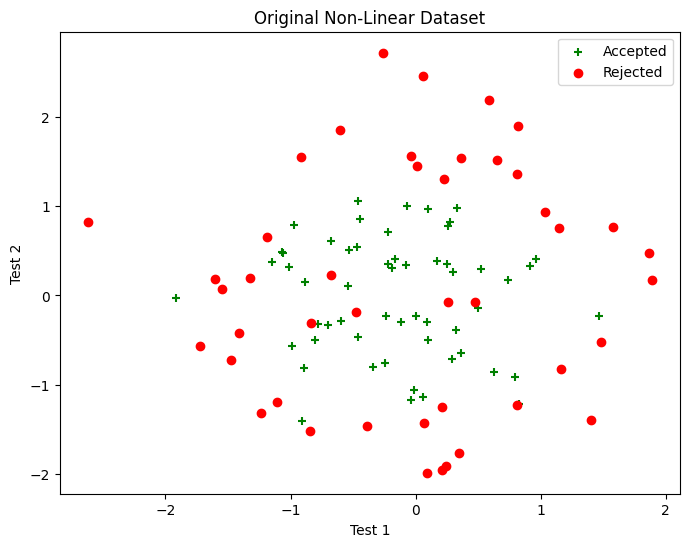

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Generate Non-Linear Data (Microchip QA Simulation)
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))
# Rule: If x1^2 + x2^2 < 1.5, it's Class 1 (Accepted), else Class 0 (Rejected)
y = (X[:, 0]**2 + X[:, 1]**2 < 1.5).astype(int)

# Add some noise to make it realistic/harder
noise_indices = np.random.choice(100, 10, replace=False)
y[noise_indices] = 1 - y[noise_indices]  # Flip labels for noise

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='+', label='Accepted')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='o', label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.title('Original Non-Linear Dataset')
plt.show()

In [3]:
def train_and_plot(degree, C_value, title):
    """
    Trains a Logistic Regression with Polynomial Features and plots the boundary.
    - degree: Complexity of the polynomial (High degree = High Variance)
    - C_value: Inverse of Regularization strength (High C = Low Reg, Low C = High Reg)
    """
    # 1. Create Pipeline: Feature Map -> Scale -> LogReg
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C_value, solver='liblinear', max_iter=1000))
    ])
    
    # 2. Train
    model.fit(X, y)
    
    # 3. Create a meshgrid to plot decision boundary
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 4. Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='+', label='Accepted')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='o', label='Rejected')
    plt.title(f"{title}\nAccuracy: {model.score(X, y):.2f}")
    plt.legend()
    plt.show()

Experiment 1: OVERFITTING


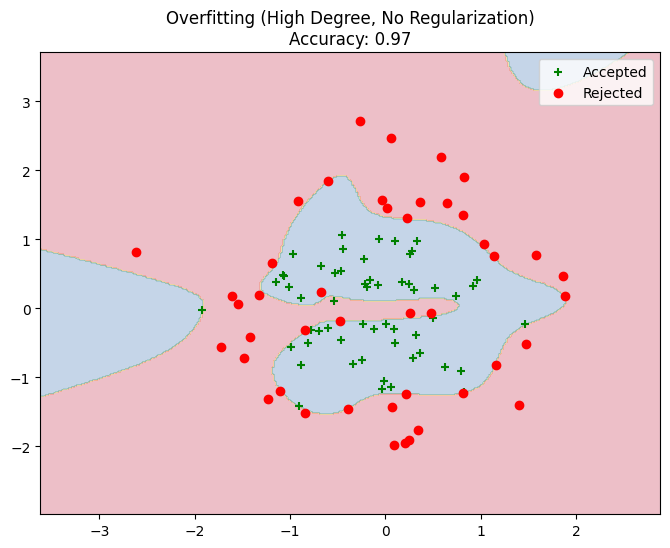

Experiment 2: REGULARIZED


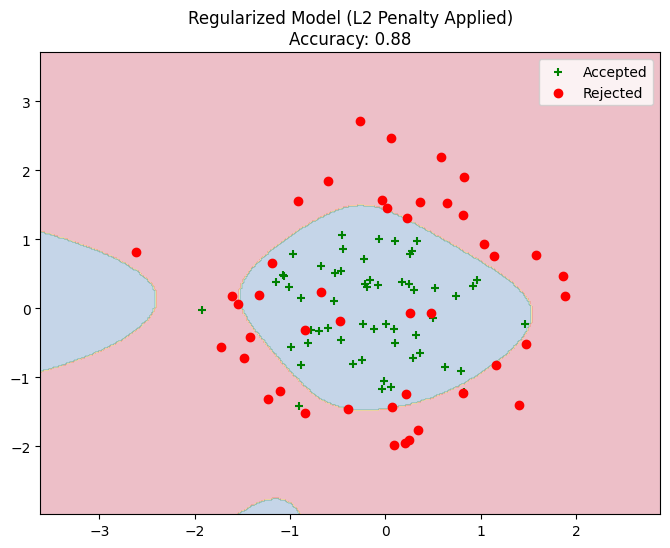

In [4]:
print("Experiment 1: OVERFITTING")
# Degree 10 is very complex. C=1e10 means practically NO regularization.
# The model will try to loop around every single noise point.
train_and_plot(degree=10, C_value=1e10, title="Overfitting (High Degree, No Regularization)")

print("Experiment 2: REGULARIZED")
# Same Degree 10, but C=1 (Strong Regularization).
# The model ignores the noise and finds the smooth circle.
train_and_plot(degree=10, C_value=0.5, title="Regularized Model (L2 Penalty Applied)")

## 2. Key Observations

1. **Overfitting:** In the first plot, the boundary is "wobbly". It twists to capture outlier points (noise). This model has **High Variance** and would perform poorly on new data.
2. **Regularization:** In the second plot, despite having the same polynomial power (Degree 10), the boundary is a smooth oval. The L2 penalty forced the weights ($w$) to remain small, effectively ignoring the noise.

**Takeaway:** Adding polynomial features allows us to model complex shapes, but Regularization is mandatory to keep the model robust.